#Binary classification using neural networks
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we correctly classify `Diabetes` knowing all the input variables?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult1.csv to adult1.csv


In [ ]:
import pandas as pd
data = pd.read_csv('adult1.csv', delimiter=',')
data.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0


In [ ]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well
dataset = np.genfromtxt('adult1.csv', delimiter=",", skip_header = True) 

In [ ]:
np.set_printoptions(precision = 2) # does not work for too wide array
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(32561, 14)

[[ 39.0  3.0  77516.0  13.0  13.0  0.0  0.0  1.0  1.0  2174.0  0.0  40.0
   1.0  0.0]
 [ 50.0  2.0  83311.0  13.0  13.0  1.0  1.0  1.0  1.0  0.0  0.0  13.0
   1.0  0.0]
 [ 38.0  1.0  215646.0  10.0  9.0  2.0  0.0  1.0  1.0  0.0  0.0  40.0
   1.0  0.0]
 [ 53.0  1.0  234721.0  6.0  7.0  1.0  1.0  2.0  1.0  0.0  0.0  40.0  1.0
   0.0]
 [ 28.0  1.0  338409.0  13.0  13.0  1.0  2.0  2.0  0.0  0.0  0.0  40.0
   14.0  0.0]]


In [ ]:
X = dataset[:, :-1]
Y = dataset[:, -1]

In [ ]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

#Design a neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim = len(X[0, :]), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Draw the network architecture
What is the total parameters? How?

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


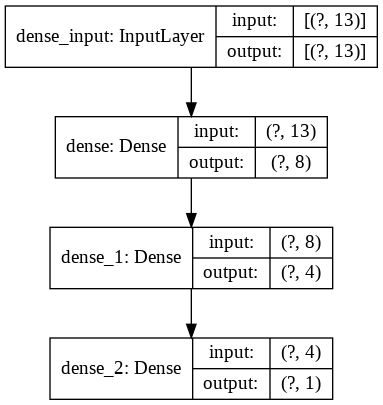

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.fit(X, Y, epochs = 256, verbose = 1)

Epoch 1/256
1018/1018 [==============================] - 1s 1ms/step - loss: 0.4464 - accuracy: 0.7931
Epoch 2/256
1018/1018 [==============================] - 1s 975us/step - loss: 0.3718 - accuracy: 0.8302
Epoch 3/256
1018/1018 [==============================] - 1s 1ms/step - loss: 0.3538 - accuracy: 0.8385
Epoch 4/256
1018/1018 [==============================] - 1s 965us/step - loss: 0.3410 - accuracy: 0.8421
Epoch 5/256
1018/1018 [==============================] - 1s 982us/step - loss: 0.3348 - accuracy: 0.8442
Epoch 6/256
1018/1018 [==============================] - 1s 982us/step - loss: 0.3320 - accuracy: 0.8457
Epoch 7/256
1018/1018 [==============================] - 1s 973us/step - loss: 0.3302 - accuracy: 0.8463
Epoch 8/256
1018/1018 [==============================] - 1s 999us/step - loss: 0.3289 - accuracy: 0.8468
Epoch 9/256
1018/1018 [==============================] - 1s 972us/step - loss: 0.3277 - accuracy: 0.8476
Epoch 10/256
1018/1018 [==============================] - 1

In [ ]:
print ('True Validation Data:')
print(Y[:10])
prediction = model.predict(X)
print ('Prediction:')
print(prediction[0:10].T)

True Validation Data:
[ 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0]
Prediction:
[[ 0.2  0.3  0.0  0.2  0.4  0.9  0.0  0.4  1.0  0.8]]


#Evaluating binary predictions

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y, prediction.round())
precision = precision_score(Y, prediction.round())
recall = recall_score(Y, prediction.round())
f1score = f1_score(Y, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Accuracy: 85.52%
Precision: 75.04%
Recall: 59.75%
F1-score: 0.67
